## Hotel Reviews: Factors Influencing Customer Satisfaction

The objective of this Notebook is to use natural language processing methods: sentiment analysis, topic modelling and aspect based sentiment analysis to identify the factors affecting customer satisfaction (positively or negatively).

This would help hotel business owners/managers understand the underlying meanings in customer reviews dropped on their businesses.

#### Steps Performed
- DESCRIPTIVE STATISTICS
- DATA VISUALIZATION
- DATA PREPROCESSING
- SENTIMENT ANALYSIS
- TOPIC MODELLING: LATENT DIRICHLET ALLOCATION (LDA)
- BERTopic MODEL

#### About Dataset
- The data is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. The dataset includes hotel location, name, rating, review data, title, username, and more.

#### Lets get started with installing libraries

In [77]:
"""%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install wordcloud
%pip install folium

%pip install scikit-learn

%pip install textblob
%pip install nltk==3.8.1

%pip install bertopic

%pip install transformers"""

'%pip install numpy\n%pip install pandas\n%pip install matplotlib\n%pip install seaborn\n%pip install wordcloud\n%pip install folium\n\n%pip install scikit-learn\n\n%pip install textblob\n%pip install nltk==3.8.1\n\n%pip install bertopic\n\n%pip install transformers'

In [2]:
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import folium
from folium.plugins import HeatMap

from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import joblib

# Topic Modelling LDA
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Topic Modelling BERT
from nltk.corpus import stopwords
import nltk
from bertopic import BERTopic
from umap import UMAP # Dimension reduction

from NLTK_download import download
#download()

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versi

#### Lets take a look at the data

In [3]:
data =  pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')

data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

In [5]:
# describing the data

data.describe()

,latitude,longitude,reviews.dateAdded,reviews.rating
count,10000.000000,10000.000000,0.0,10000.000000
mean,35.048897,-101.619599,NaN,4.084100
std,6.390993,20.158379,NaN,1.152371
min,19.438604,-159.480300,NaN,1.000000
25%,29.957700,-117.888954,NaN,4.000000
50%,33.804844,-95.997600,NaN,4.000000
75%,39.048210,-84.371578,NaN,5.000000
max,64.843590,-71.073340,NaN,5.000000


In [6]:
data['reviews.rating'].value_counts()

5    4840
4    2849
3    1190
1     567
2     554
Name: reviews.rating, dtype: int64

In [7]:
# How many hotels do we have?

num = len(data['name'].unique().tolist())
print('The number of Hotels are -',num )

The number of Hotels are - 1311


In [8]:
# What are the most popular hotels?
# Top 10 Hotels (Most Popular)
data['name'].value_counts().nlargest(10)

Hyatt House Seattle/Downtown                          209
Hotel Emma                                            183
French Market Inn                                     144
St. James Hotel, an Ascend Hotel Collection Member    136
Grand Hyatt Seattle                                   135
Luana Waikiki Hotel & Suites                          132
Best Western Seven Seas                               132
Drury Inn & Suites New Orleans                        132
Galleria Park Hotel                                   125
Homewood Suites by Hilton Lake Buena Vista-Orlando    122
Name: name, dtype: int64

#### Data Visualization

Lets see what our review titles look like

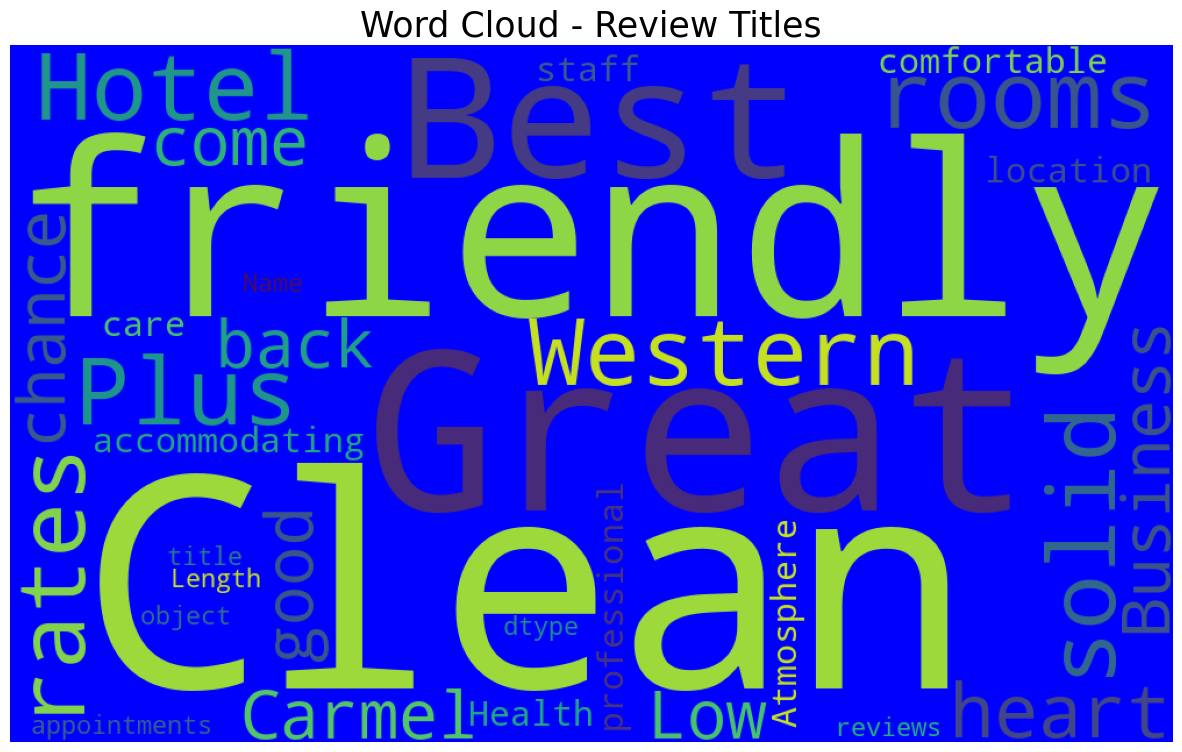

In [9]:
stop_words = list(STOPWORDS)

wordcloud = WordCloud(background_color = 'blue', stopwords = stop_words, width = 1000, height = 600).generate(str(data['reviews.title']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Review Titles', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Next, a barplot that shows the top 10 hotels with 5/5 rating

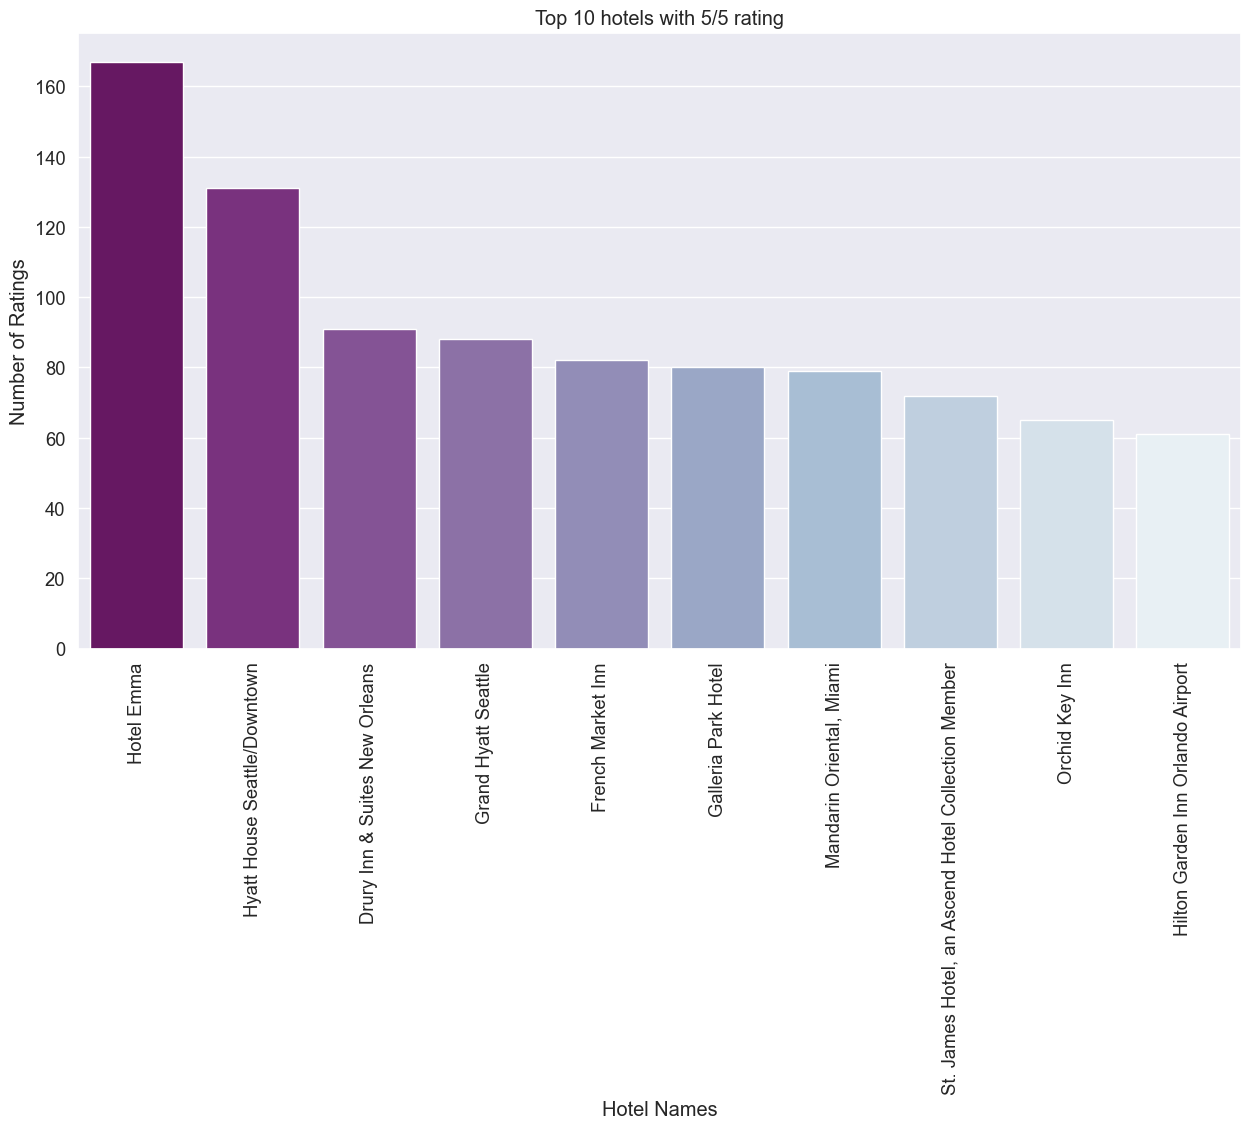

In [10]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data['reviews.rating'] == 5, "name"].value_counts())
hotelname = list(rating.keys())
hotel_rating = list(rating.values())

sns_rating = sns.barplot(x = hotelname[0:10], y = hotel_rating[0:10], palette = 'BuPu_r')

sns_rating.set_title('Top 10 hotels with 5/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Hotel Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Next, This barplot shows the Top 10 hotels with the 1/5 rating

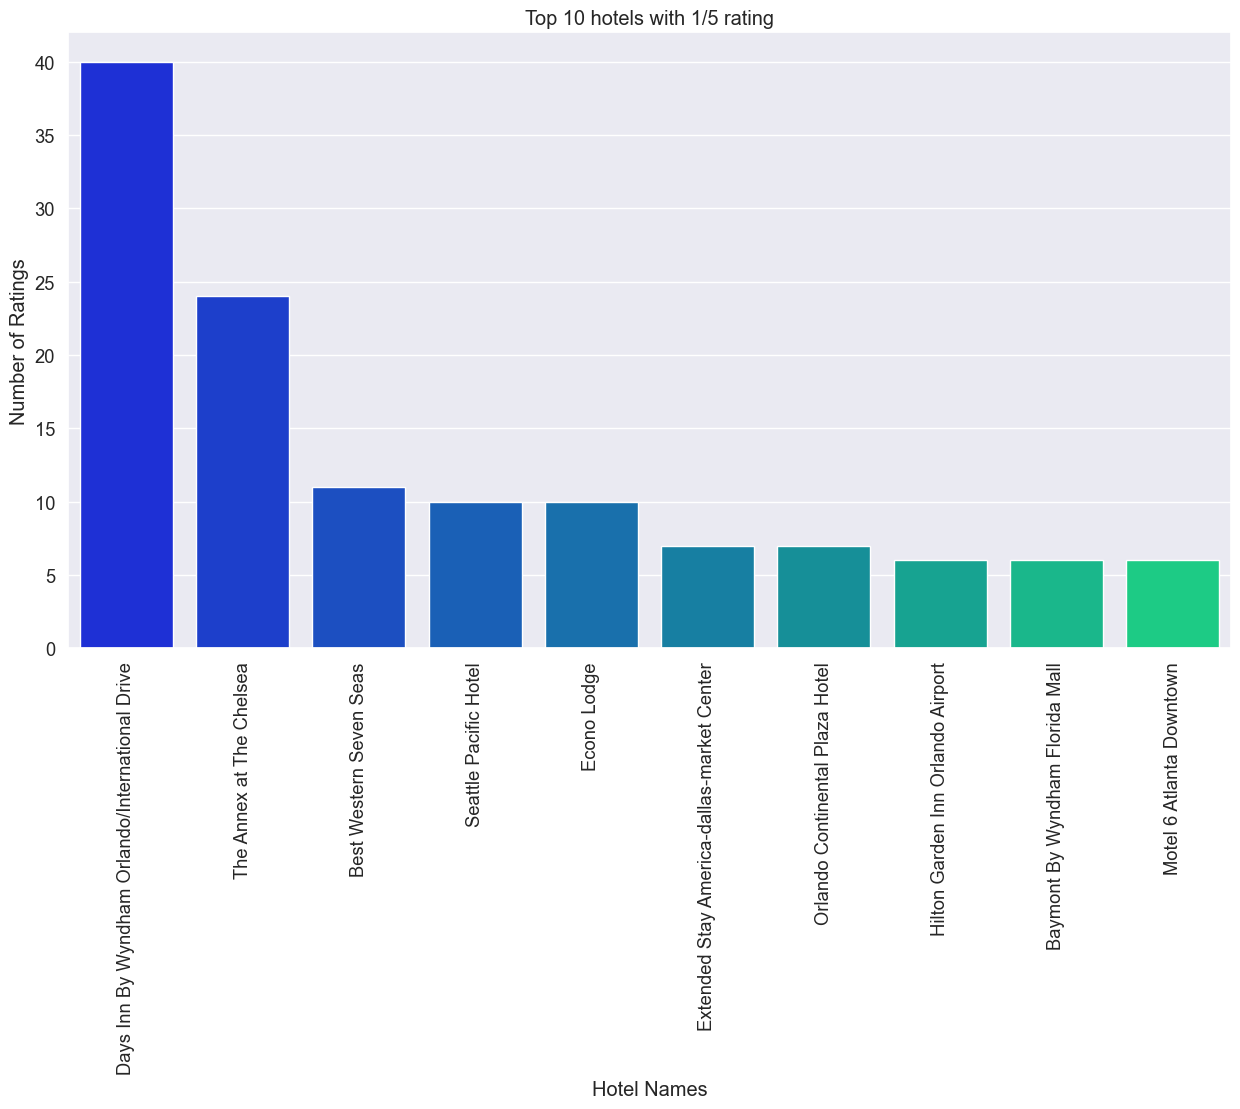

In [11]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data['reviews.rating'] == 1, "name"].value_counts())
hotelname = list(rating.keys())
hotel_rating = list(rating.values())

sns_rating = sns.barplot(x = hotelname[0:10], y = hotel_rating[0:10], palette = 'winter')

sns_rating.set_title('Top 10 hotels with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Hotel Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Then, a bar chart would perfectly represent ratings by size

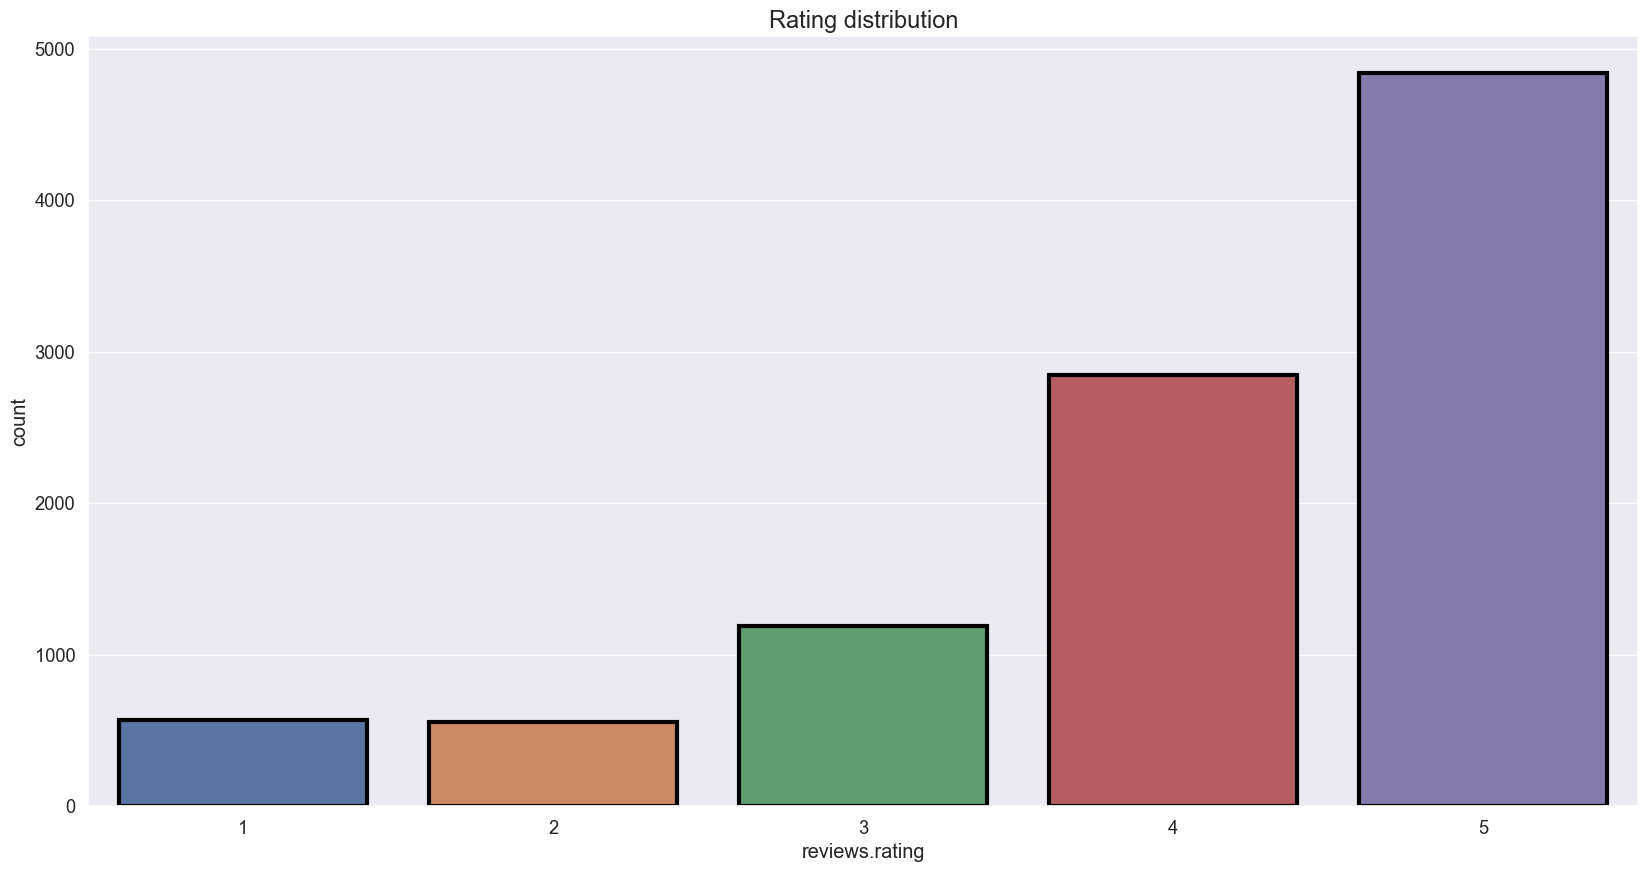

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="reviews.rating",edgecolor='black',linewidth=3)
plt.title('Rating distribution',size=17)
plt.show()

We observe that a lot of people rated positives (4,5)

#### More Visualization

Now, we'd plot the number of reviews over time to identify trends or seasonality.

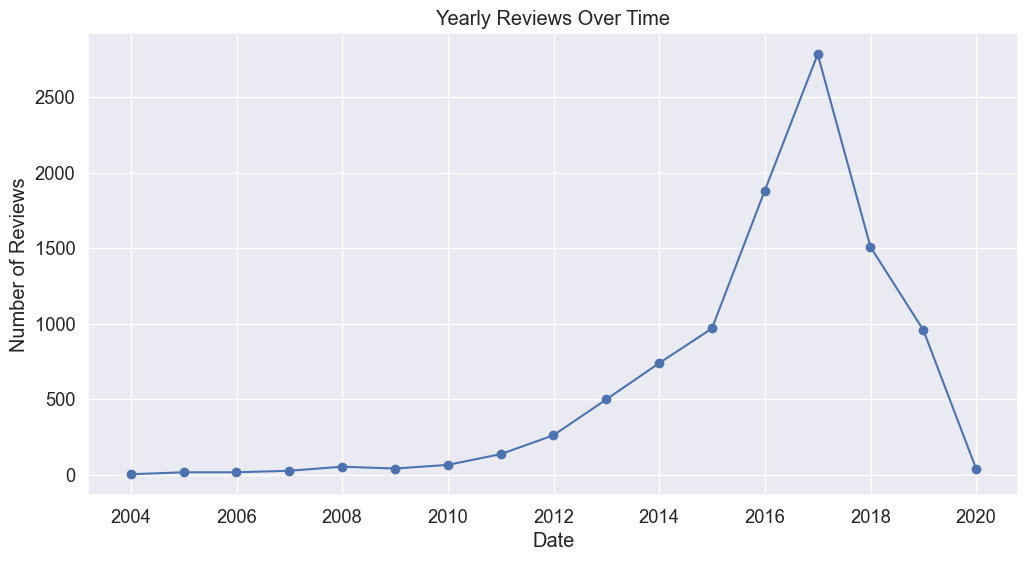

In [13]:
data_temp = data.copy()
data_temp['reviews.date'] = pd.to_datetime(data_temp['reviews.date'])

# Set the 'reviews.date' column as the index
data_temp.set_index('reviews.date', inplace=True)

# Resample the data to get the count of reviews per day
daily_reviews_count = data_temp.resample('Y').size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_reviews_count, marker='o', linestyle='-', color='b')
plt.title('Yearly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

Then, We visualize the number of reviews for the top cities in our dataset.

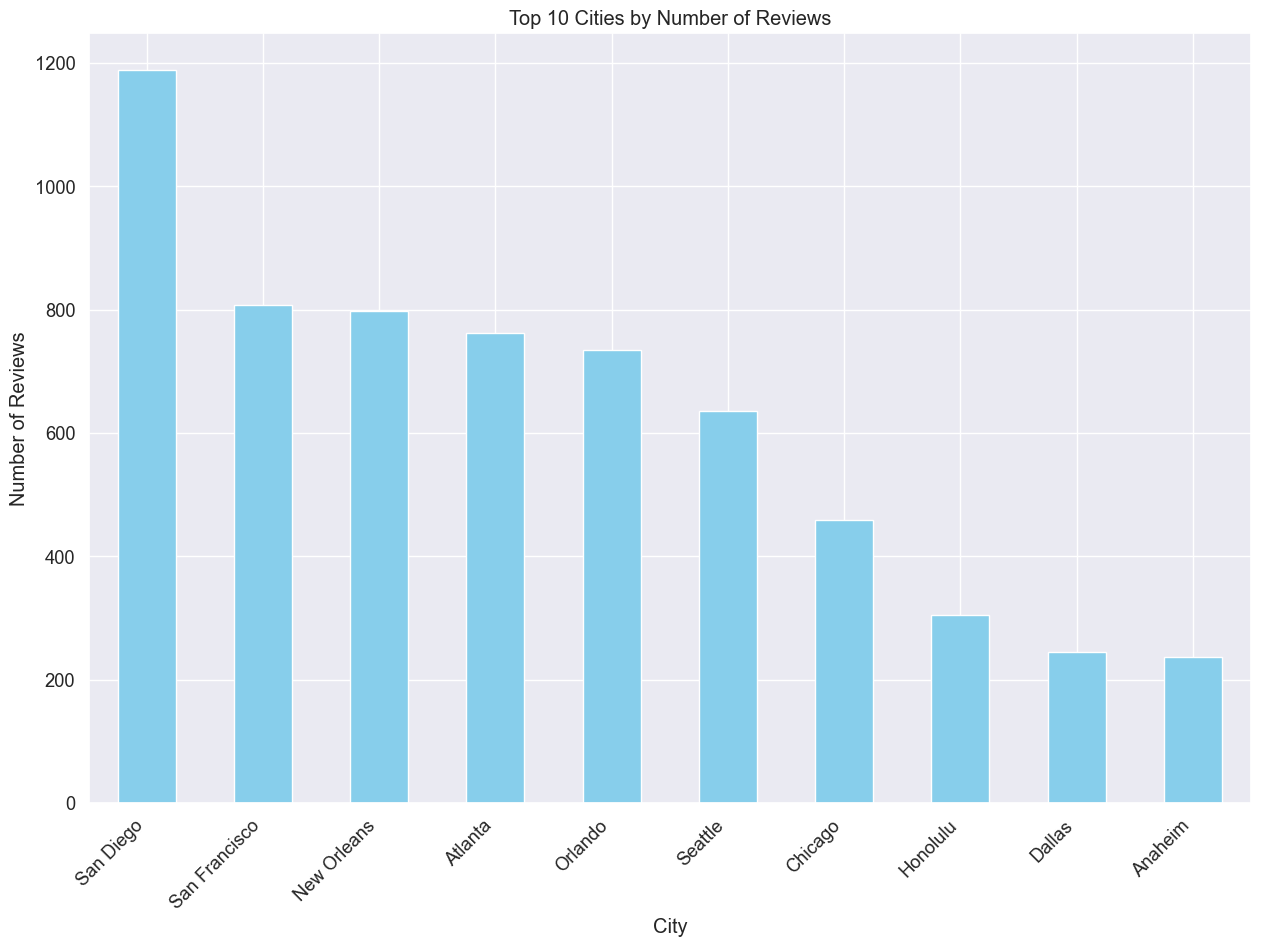

In [14]:
top_cities = data['city'].value_counts().nlargest(10)

# Plotting the bar plot
plt.figure(figsize=(15, 10))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Reviews')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Now, we explore the hierarchy of cities, and ratings using a sunburst chart.

In [16]:
fig = px.sunburst(data, path=['city', 'reviews.rating'], title='Sunburst Chart of Cities and Ratings')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))  # Adjust margin for better layout
fig.show()

#### Even More Visualization

Plot a heatmap of review density based on latitude and longitude.

In [17]:
# Create a folium map centered around the mean latitude and longitude
center_latitude = data['latitude'].mean()
center_longitude = data['longitude'].mean()
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Create a HeatMap layer using latitude and longitude
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save('geospatial_heatmap.html')  # Save the map as an HTML file

Next, we create a choropleth map to visualize the average ratings across different provinces or regions.

In [18]:
# Calculate the average rating for each province
province_stats = data.groupby('province')['reviews.rating'].mean().reset_index()

# Create a choropleth map
fig = px.choropleth(province_stats, 
                    locations='province', 
                    locationmode='USA-states',
                    color='reviews.rating',
                    hover_name='province',
                    title='Choropleth Map of Average Ratings by Province',
                    color_continuous_scale='Viridis',
                    scope='usa')  # Set the scope to 'usa' for United States

# Show the map
fig.show()

#### Data Preprocessing

No we are done performing EDA, moving foward we would be using only reviews in our data.

In [19]:
#data =  pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')

In [20]:
data = data[['reviews.title','reviews.text','reviews.rating']]

data.dropna(inplace=True)

Now we would combine our reviews text and title into a new column called full_review

In [21]:
data['full_review'] = data['reviews.title'] + '. ' + data['reviews.text']
data

,reviews.title,reviews.text,reviews.rating,full_review
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,Best Western Plus Hotel. This hotel was nice a...
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,Clean rooms at solid rates in the heart of Car...
2,Business,"Parking was horrible, somebody ran into my ren...",3,"Business. Parking was horrible, somebody ran i..."
3,Very good,Not cheap but excellent location. Price is som...,5,Very good. Not cheap but excellent location. P...
4,Low chance to come back here,If you get the room that they advertised on th...,2,Low chance to come back here. If you get the r...
...,...,...,...,...
9995,Very accommodating and friendly staff!,My friends and I took a trip to Hampton for th...,4,Very accommodating and friendly staff!. My fri...
9996,"comfortable, friendly, clean, professional","from check in to departure, staff is friendly,...",5,"comfortable, friendly, clean, professional. fr..."
9997,Great location,This Hampton is located on a quiet street acro...,5,Great location. This Hampton is located on a q...
9998,Great Atmosphere!,Awesome wings (my favorite was garlic parmesan...,5,Great Atmosphere!. Awesome wings (my favorite ...


In [22]:
# Clean our reviews: Remove unwanted characters and spaces

def review_clean(review):
    # changing to lower case
    lower = review.str.lower()
    
    # Removing all the special Characters
    special_remove = lower.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # removing double quotesfrom string
    dataframe_new = multiw_remove.str.strip('\"')
    
    return dataframe_new

In [23]:
data['full_review'] = review_clean(data['full_review'])
data.head()

,reviews.title,reviews.text,reviews.rating,full_review
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,best western plus hotel this hotel was nice an...
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,clean rooms at solid rates in the heart of car...
2,Business,"Parking was horrible, somebody ran into my ren...",3,business parking was horrible somebody ran int...
3,Very good,Not cheap but excellent location. Price is som...,5,very good not cheap but excellent location pri...
4,Low chance to come back here,If you get the room that they advertised on th...,2,low chance to come back here if you get the ro...


#### Sentiment Analysis

We will create a new column of sentiment based on the ratings

In [24]:
# feature engineering step
# let's make a new column review sentiment 

# Define the conditions and corresponding choices for the sentiment categories
conditions = [
    (data['reviews.rating'] >= 4), # positive
    (data['reviews.rating'] == 3), # neutral
    (data['reviews.rating'] <= 2) # negative
]
choices = ['Positive', 'Neutral', 'Negative']

# Create a new column 'Sentiment' based on the conditions and choices
data['Review_Sentiment'] = np.select(conditions, choices, default='Unknown')

data['Review_Sentiment'].value_counts()

Positive    7688
Neutral     1190
Negative    1121
Name: Review_Sentiment, dtype: int64

Test a pre-trained models to determine sentiments from just texts

In [25]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Analyze sentiment for each sentence Text Blob
def get_sentiment_blob(review):
    
    blob = TextBlob(review)

    # Classify the sentiment based on the compound score
    if blob.sentiment.polarity > 0:
        return "Positive"
    elif blob.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"
    

def get_sentiment_vader(review):

    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(review)

    if sentiment_scores['compound'] >= 0.05:
        return "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [26]:
data['Review_Sentiment_Blob'] = data['full_review'].apply(get_sentiment_blob)
data['Review_Sentiment_Vader'] = data['full_review'].apply(get_sentiment_vader)


In [27]:
data.head(3)

,reviews.title,reviews.text,reviews.rating,full_review,Review_Sentiment,Review_Sentiment_Blob,Review_Sentiment_Vader
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,best western plus hotel this hotel was nice an...,Neutral,Positive,Positive
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,clean rooms at solid rates in the heart of car...,Positive,Positive,Positive
2,Business,"Parking was horrible, somebody ran into my ren...",3,business parking was horrible somebody ran int...,Neutral,Negative,Negative


In [28]:
print("=========Users Ratings==========")
print(data['Review_Sentiment'].value_counts())

print("=========Blob Predictions==========")
print(data['Review_Sentiment_Blob'].value_counts())

print("=========Vader Predictions==========")
print(data['Review_Sentiment_Vader'].value_counts())

=========Users Ratings==========
Positive    7688
Neutral     1190
Negative    1121
Name: Review_Sentiment, dtype: int64
=========Blob Predictions==========
Positive    9465
Negative     516
Neutral       18
Name: Review_Sentiment_Blob, dtype: int64
=========Vader Predictions==========
Positive    9334
Negative     583
Neutral       82
Name: Review_Sentiment_Vader, dtype: int64


In [29]:
# Compute Metrics for our predictions: Assuming User Ratings as Accurate

def calculate_metrics(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"{label} Accuracy: {accuracy:.2f}")
    print(f"{label} Precision: {precision:.2f}")
    print(f"{label} Recall: {recall:.2f}")
    print(f"{label} F1 Score: {f1:.2f}")
    print()


# Vader
calculate_metrics(data['Review_Sentiment'], data['Review_Sentiment_Vader'], 'Vader')

# Blob
calculate_metrics(data['Review_Sentiment'], data['Review_Sentiment_Blob'], 'Blob')

Vader Accuracy: 0.81
Vader Precision: 0.74
Vader Recall: 0.81
Vader F1 Score: 0.75

Blob Accuracy: 0.81
Blob Precision: 0.73
Blob Recall: 0.81
Blob F1 Score: 0.74



We've seen that Neither Vader or Text Blob pre-trained sentiment models perform well for our use case.

So now we'd use a model we can pre-train on our data. We'd try <b>Randmon Forest Classifier</b>

First lets, Create a subset of our data where we have a balanced sentiment class. This will be beneficial to our Random Forest Classifier

In [30]:
# Review Rating Sentiments from user
class_counts = data['Review_Sentiment'].value_counts()

# Downsample to Neutral
desired_count = class_counts['Neutral']

# Downsample the "Positive" and "Negative" classes
downsampled_positive = data[data['Review_Sentiment'] == 'Positive'].sample(n=desired_count, replace=True, random_state=42)
downsampled_negative = data[data['Review_Sentiment'] == 'Negative'].sample(n=desired_count, replace=True, random_state=42)

# Keep all samples from the "Neutral" class
neutral_samples = data[data['Review_Sentiment'] == 'Neutral']

# Concatenate the downsampled "Positive" and "Negative" with the "Neutral" samples
downsampled_df = pd.concat([downsampled_positive, downsampled_negative, neutral_samples], ignore_index=True)

# Shuffle the DataFrame to randomize the order of samples
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

downsampled_df['Review_Sentiment'].value_counts()

Positive    1190
Negative    1190
Neutral     1190
Name: Review_Sentiment, dtype: int64

In [31]:
downsampled_df.head(2)

,reviews.title,reviews.text,reviews.rating,full_review,Review_Sentiment,Review_Sentiment_Blob,Review_Sentiment_Vader
0,Very good choice for dinner.,We ate in the pub of the hotel during happy ho...,4,very good choice for dinner we ate in the pub ...,Positive,Positive,Positive
1,"Lacking in amenities, insect room-mates.","When we got there to check in, they made us pa...",1,lacking in amenities insect room mates when we...,Negative,Negative,Negative


We'd Label Encode our Review Sentiment Column

In [32]:
lb = LabelEncoder()
downsampled_df["Review_Sentiment"] = lb.fit_transform(downsampled_df["Review_Sentiment"])

In [49]:
label_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))

# Print the mapping
print("Label Mapping:")
for category, numerical_value in label_mapping.items():
    print(f"{category}: {numerical_value}")

Label Mapping:
Negative: 0
Neutral: 1
Positive: 2


In [33]:
features = downsampled_df["full_review"] # Reviews
y = downsampled_df["Review_Sentiment"] # Labels

Then let's create a function that will pre-process and clean the review. It does the following:

* Tokenize sentences
* Remove stopwords
* Lemmatize the tokens

In [34]:
def preprocess(text):
    """Pre-Process Review"""
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')

    no_stopwords = ' '.join([word for word in text.split() if word not in stopword])
    lemm_text = ''.join([wn.lemmatize(word) for word in no_stopwords])
    clean_text = lemm_text.strip()

    return clean_text

In [35]:
features[:3]

0    very good choice for dinner we ate in the pub ...
1    lacking in amenities insect room mates when we...
2    my stay staff were very pleasant helpful under...
Name: full_review, dtype: object

In [36]:
features_processed = features.apply(preprocess)

In [37]:
features_processed[:3]

0    good choice dinner ate pub hotel happy hour go...
1    lacking amenities insect room mates got check ...
2    stay staff pleasant helpful understanding envi...
Name: full_review, dtype: object

In [38]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(features_processed)
X = tfidf_vectorizer.transform(features_processed)

In [39]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [42]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       240
           1       0.67      0.65      0.66       227
           2       0.80      0.81      0.80       247

    accuracy                           0.77       714
   macro avg       0.76      0.76      0.76       714
weighted avg       0.77      0.77      0.77       714



In [43]:
# save model
joblib.dump(rf_classifier, "random_forest.joblib")
# save vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

['random_forest.joblib']

#### Topic Modelling: LDA

Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling. It assumes that each document in a corpus is a mixture of several topics, and each topic is a probability distribution over words. The underlying assumption is that documents are probabilistically generated based on this topic-word distribution. Here is a detailed overview of how LDA works:

- The corpus of text is first tokenized into words.
- A Dirichlet distribution is created over the topics.
- For each document, a topic distribution is sampled from the Dirichlet distribution.
- For each word in the document, a word is sampled from the topic distribution.
- This process is repeated for all documents in the corpus.

Let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [44]:
stop_words = stopwords.words('english')
stop_words.extend(['get', 'got', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_lda = data['full_review'][:1000].values.tolist()
data_words = list(sent_to_words(data_lda))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['best', 'western', 'plus', 'hotel', 'hotel', 'nice', 'quiet', 'know', 'train', 'track', 'near', 'train', 'passed', 'stay', 'best', 'western', 'changed', 'hotel', 'classification', 'plus', 'category']


In [45]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2)]


In [46]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

How Many Topics?

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

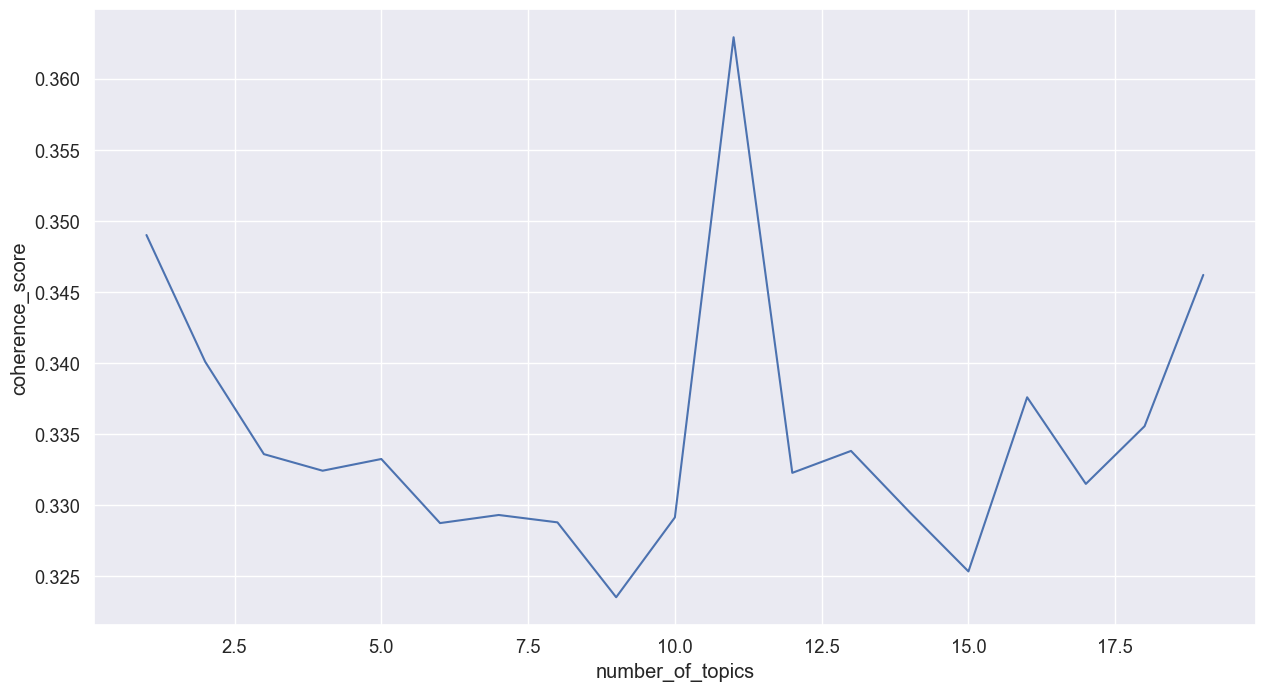

In [47]:
# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,20):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            iterations=50,
                                            num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                        texts=texts, 
                                        dictionary=id2word, 
                                        coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [48]:
from pprint import pprint

# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 7 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"hotel" + 0.017*"room" + 0.015*"great" + 0.014*"stay" + 0.010*"nice" '
  '+ 0.009*"staff" + 0.008*"location" + 0.007*"would" + 0.006*"free" + '
  '0.006*"us"'),
 (1,
  '0.025*"hotel" + 0.018*"stay" + 0.011*"great" + 0.011*"nice" + 0.011*"room" '
  '+ 0.010*"staff" + 0.008*"location" + 0.008*"good" + 0.007*"us" + '
  '0.007*"would"'),
 (2,
  '0.023*"hotel" + 0.016*"room" + 0.012*"great" + 0.011*"staff" + 0.009*"stay" '
  '+ 0.008*"us" + 0.008*"clean" + 0.007*"location" + 0.006*"thank" + '
  '0.006*"nice"'),
 (3,
  '0.017*"hotel" + 0.015*"great" + 0.012*"room" + 0.011*"stay" + 0.009*"clean" '
  '+ 0.008*"breakfast" + 0.008*"location" + 0.007*"time" + 0.006*"new" + '
  '0.006*"us"'),
 (4,
  '0.023*"hotel" + 0.016*"great" + 0.013*"stay" + 0.012*"room" + 0.011*"good" '
  '+ 0.011*"staff" + 0.010*"location" + 0.009*"clean" + 0.008*"nice" + '
  '0.007*"breakfast"'),
 (5,
  '0.021*"room" + 0.020*"hotel" + 0.014*"stay" + 0.010*"staff" + '
  '0.008*"location" + 0.007*"great" + 0.00

In [49]:
import pyLDAvis.gensim
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.005618 -0.007197       1        1  27.267634
5     -0.002474 -0.017556       2        1  16.095270
0      0.009640  0.004900       3        1  14.005091
4      0.008378  0.019315       4        1  13.274992
1      0.007274  0.006104       5        1  11.604837
3     -0.035320  0.005169       6        1   9.476181
2      0.006884 -0.010734       7        1   8.275996, topic_info=          Term         Freq        Total Category  logprob  loglift
4        hotel  1448.000000  1448.000000  Default  30.0000  30.0000
163      great   783.000000   783.000000  Default  29.0000  29.0000
11        stay   857.000000   857.000000  Default  28.0000  28.0000
19       clean   430.000000   430.000000  Default  27.0000  27.0000
7         nice   484.000000   484.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
34       rooms    24.398501   384.533271   Topic7  -5.4217  -0.2657
24        good    27.494289   495.521055   Topic7  -5.3023  -0.3998
206   friendly    20.170395   269.752472   Topic7  -5.6120  -0.1015
15        back    18.585083   244.380941   Topic7  -5.6939  -0.0846
46   breakfast    21.319087   393.326895   Topic7  -5.5566  -0.4232

[570 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3877      1  0.489811         abril
3844      5  0.597253     absolutly
1315      1  0.489822       academy
6280      2  0.541518    accessable
4981      1  0.625602  accomadating
...     ...       ...           ...
854       2  0.161277          wwii
854       3  0.161277          wwii
854       4  0.161277          wwii
854       6  0.322554          wwii
1907      6  0.566698           yhe

[1208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 5, 2, 4, 3])

#### Topic Modelling: Deep Learning With BERTopic

In [50]:
# Take a look at the data
data.head(3)

,reviews.title,reviews.text,reviews.rating,full_review,Review_Sentiment,Review_Sentiment_Blob,Review_Sentiment_Vader
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,best western plus hotel this hotel was nice an...,Neutral,Positive,Positive
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,clean rooms at solid rates in the heart of car...,Positive,Positive,Positive
2,Business,"Parking was horrible, somebody ran into my ren...",3,business parking was horrible somebody ran int...,Neutral,Negative,Negative


In [51]:
extras = ["seattle","hyatt","san","francisco","orleans","diego","hampton","orlando","florida","chicago","philadelphia","atlanta",\
          "us","waikiki"]

def preprocess2(text):
    """Pre-Process Review"""
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(extras)

    no_stopwords = ' '.join([word for word in text.split() if word not in stopword])
    lemm_text = ''.join([wn.lemmatize(word) for word in no_stopwords])
    clean_text = lemm_text.strip()

    return clean_text

In [52]:
data['full_review_cleaned'] = data['full_review'].apply(preprocess2)

In [53]:
data.head(3)

,reviews.title,reviews.text,reviews.rating,full_review,Review_Sentiment,Review_Sentiment_Blob,Review_Sentiment_Vader,full_review_cleaned
0,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",3,best western plus hotel this hotel was nice an...,Neutral,Positive,Positive,best western plus hotel hotel nice quiet know ...
1,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,4,clean rooms at solid rates in the heart of car...,Positive,Positive,Positive,clean rooms solid rates heart carmel stayed ki...
2,Business,"Parking was horrible, somebody ran into my ren...",3,business parking was horrible somebody ran int...,Neutral,Negative,Negative,business parking horrible somebody ran rental ...


In [79]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(data['full_review_cleaned'].iloc[:3000])

2023-12-29 08:34:37,380 - BERTopic - Transformed documents to Embeddings
2023-12-29 08:34:50,879 - BERTopic - Reduced dimensionality
2023-12-29 08:34:51,227 - BERTopic - Clustered reduced embeddings


In [80]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1466,-1_hotel_room_great_stay,"[hotel, room, great, stay, staff, clean, locat...",[grand holiday grand fourth july time hit road...
1,0,143,0_staff_stay_hotel_great,"[staff, stay, hotel, great, thank, review, fri...",[wonderful experience amazing time hotel def c...
2,1,138,1_beach_ocean_boardwalk_view,"[beach, ocean, boardwalk, view, pacific, locat...",[best place beach great place stay 7 trip beac...
3,2,104,2_center_location_convention_downtown,"[center, location, convention, downtown, good,...",[great location ask good view particularly get...
4,3,80,3_western_seas_seven_best,"[western, seas, seven, best, staff, stay, than...",[last minute trip thrilled find availability h...
5,4,78,4_room_hotel_one_would,"[room, hotel, one, would, also, desk, check, g...",[place days inn stayed days inn cities another...
6,5,75,5_breakfast_clean_staff_great,"[breakfast, clean, staff, great, good, stay, f...",[excellent stay good experience staff professi...
7,6,73,6_room_bugs_smell_disgusting,"[room, bugs, smell, disgusting, dirty, roach, ...",[got 4 6 spider bites staying travel often 1 2...
8,7,67,7_noisy_noise_room_hotel,"[noisy, noise, room, hotel, hear, loud, walls,...",[noisy hotel small rooms hotel placed middle i...
9,8,66,8_quarter_bienville_french_house,"[quarter, bienville, french, house, new, great...",[bienville house home away home family friends...


In [81]:
topic_model.get_topic_info().to_excel("Topics.xlsx")

In [82]:
# Get top 10 terms for topic 0
topic_model.get_topic(0)

[('staff', 0.027680649866469936),
 ('stay', 0.026360041573843338),
 ('hotel', 0.02553292688019247),
 ('great', 0.02425049847569704),
 ('thank', 0.023264911643562973),
 ('review', 0.01885833585358194),
 ('friendly', 0.01747329831166626),
 ('stayed', 0.016404314717018285),
 ('back', 0.015083434971068982),
 ('experience', 0.015030068399086504)]

In [83]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=20)

In [84]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [85]:
Cluster1 = [6,14,25,30] # Guest Complaints and Hotel Issues
Cluster2 = [2,5,8,10,15,17,24,26,27,31] # Positive Guest Experiences and Hotel Amenities
Cluster3 = [7,13,28,32,33] # Noise and Comfort Considerations in Accommodations
Cluster4 = [0,4,9,11,12,19,20,21,22,23,29,1,3,16,18] # Hotel Guest Feedback and Interactions

In [86]:
# Create sets of word representations for each cluster

topic_words = {}
for topic_idx in range(len(topic_model.get_topics()) - 1):
    words_with_scores = topic_model.get_topic(topic_idx)
    words = [word for word, score in words_with_scores]   
    topic_words[topic_idx] = set(words)

Cluster1_words = set()
for idx in Cluster1:
    Cluster1_words.update(topic_words[idx])

Cluster2_words = set()
for idx in Cluster2:
    Cluster2_words.update(topic_words[idx])

Cluster3_words = set()
for idx in Cluster3:
    Cluster3_words.update(topic_words[idx])

Cluster4_words = set()
for idx in Cluster4:
    Cluster4_words.update(topic_words[idx])

# Now, you have sets of word representations for each cluster:
print("Cluster 1 Words:", Cluster1_words)
print("Cluster 2 Words:", Cluster2_words)
print("Cluster 3 Words:", Cluster3_words)
print("Cluster 4 Words:", Cluster4_words)

Cluster 1 Words: {'customer', 'fixed', 'reservation', 'please', 'mold', 'reviews', 'bathroom', 'feedback', 'smell', 'stay', 'charged', 'rooms', 'guest', 'reservations', 'hotel', 'cancellation', 'roaches', 'place', 'problem', 'smoke', 'refund', 'front', 'worst', 'ever', 'told', 'desk', 'booking', 'roach', 'dirty', 'never', 'sheets', 'booked', 'said', 'bugs', 'absolutley', 'disgusting', 'room', 'housekeeping'}
Cluster 2 Words: {'helpful', 'french', 'good', 'house', 'quarter', 'downtown', 'universal', 'walking', 'weekend', 'convention', 'clean', 'bienville', 'suite', 'great', 'michigan', 'location', 'restaurants', 'polk', 'walk', 'nicely', 'roc', 'jesus', 'stay', 'governors', 'disneyland', 'staff', 'always', 'airport', 'anaheim', 'ave', 'eden', 'hotel', 'pablo', 'square', 'convenient', 'amazing', 'near', 'trip', 'price', 'union', 'disney', 'friendly', 'close', 'breakfast', 'thank', 'center', 'inn', 'nice', 'manager', 'new', 'river', 'view', 'hop', 'general', 'family', 'del', 'room', 'town

In [87]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=34, width=1000)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [88]:
# Create new column and Assign topics.

def predict_topics(row):
    topic, _ = topic_model.transform(row[-1])  # Last column in data is our lematized review
    if topic[0] == -1:
        topic_text = "Others"
    elif topic[0] in Cluster1:
        topic_text = "Guest Complaints and Hotel Issues"
    elif topic[0] in Cluster2:
        topic_text = "Positive Guest Experiences and Hotel Amenities"
    elif topic[0] in Cluster3:
        topic_text = "Noise and Comfort Considerations in Accommodations"
    elif topic[0] in Cluster4:
        topic_text = "Hotel Guest Feedback and Interactions"
    else:
        topic_text = None
    return topic_text


# Apply function to dataset
data['Topics'] = data.progress_apply(predict_topics, axis=1)

  0%|          | 0/9999 [00:00<?, ?it/s]

2023-12-29 08:38:31,065 - BERTopic - Reduced dimensionality
2023-12-29 08:38:31,075 - BERTopic - Calculated probabilities with HDBSCAN
2023-12-29 08:38:31,076 - BERTopic - Predicted clusters
2023-12-29 08:38:32,166 - BERTopic - Reduced dimensionality
2023-12-29 08:38:32,176 - BERTopic - Calculated probabilities with HDBSCAN
2023-12-29 08:38:32,178 - BERTopic - Predicted clusters
2023-12-29 08:38:33,203 - BERTopic - Reduced dimensionality
2023-12-29 08:38:33,212 - BERTopic - Calculated probabilities with HDBSCAN
2023-12-29 08:38:33,212 - BERTopic - Predicted clusters
2023-12-29 08:38:34,039 - BERTopic - Reduced dimensionality
2023-12-29 08:38:34,057 - BERTopic - Calculated probabilities with HDBSCAN
2023-12-29 08:38:34,069 - BERTopic - Predicted clusters
2023-12-29 08:38:36,754 - BERTopic - Reduced dimensionality
2023-12-29 08:38:36,763 - BERTopic - Calculated probabilities with HDBSCAN
2023-12-29 08:38:36,764 - BERTopic - Predicted clusters
2023-12-29 08:38:37,592 - BERTopic - Reduced 

In [157]:
# Save the topic model
topic_model.save("topic_model")

#### Export Data

In [66]:
data1 =  pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
data2 =  pd.read_csv('data_topics.csv')

In [67]:
print(len(data1))
print(len(data2))

10000
9999


In [68]:
data1 = data1[['name','address','city','province','reviews.title']]

data1.dropna(inplace=True)
data1.drop('reviews.title', axis=1, inplace=True)

In [69]:
data2.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
data1.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)


In [71]:
merged_df = pd.concat([data1, data2], axis=1)

In [72]:
columns_to_keep = ['name','reviews.title', 'reviews.text', 'address', 'city', 'province', 'Review_Sentiment', 'Topics']
merged_df = merged_df[columns_to_keep]

merged_df

,name,reviews.title,reviews.text,address,city,province,Review_Sentiment,Topics
0,Best Western Plus South Coast Inn,Best Western Plus Hotel,"This hotel was nice and quiet. Did not know, t...",5620 Calle Real,Goleta,CA,Neutral,Hotel Guest Feedback and Interactions
1,Best Western Carmel's Town House Lodge,Clean rooms at solid rates in the heart of Carmel,We stayed in the king suite with the separatio...,5th And San Carlos PO Box 3574,Carmel by the Sea,CA,Positive,Others
2,Best Western Carmel's Town House Lodge,Business,"Parking was horrible, somebody ran into my ren...",5th And San Carlos PO Box 3574,Carmel by the Sea,CA,Neutral,Others
3,Best Western Carmel's Town House Lodge,Very good,Not cheap but excellent location. Price is som...,5th And San Carlos PO Box 3574,Carmel by the Sea,CA,Positive,Others
4,Best Western Carmel's Town House Lodge,Low chance to come back here,If you get the room that they advertised on th...,5th And San Carlos PO Box 3574,Carmel by the Sea,CA,Negative,Others
...,...,...,...,...,...,...,...,...
9994,Hampton Inn Hampton-newport News,Very accommodating and friendly staff!,My friends and I took a trip to Hampton for th...,3101 Coliseum Dr,Hampton,VA,Positive,Others
9995,Hampton Inn Hampton-newport News,"comfortable, friendly, clean, professional","from check in to departure, staff is friendly,...",3101 Coliseum Dr,Hampton,VA,Positive,Others
9996,Hampton Inn Hampton-newport News,Great location,This Hampton is located on a quiet street acro...,3101 Coliseum Dr,Hampton,VA,Positive,Others
9997,Roseberry's Inn,Great Atmosphere!,Awesome wings (my favorite was garlic parmesan...,7886 Main Street,Hunter,NY,Positive,Others


In [73]:
merged_df.rename(columns = {'reviews.title':'title','reviews.text':'review'}, inplace = True) 

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              9999 non-null   object
 1   title             9999 non-null   object
 2   review            9999 non-null   object
 3   address           9999 non-null   object
 4   city              9999 non-null   object
 5   province          9999 non-null   object
 6   Review_Sentiment  9999 non-null   object
 7   Topics            9999 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [75]:
hotels = pd.read_csv('hotels.csv')
hotels.drop('Unnamed: 0', axis=1, inplace=True)

hotel_adresses = pd.merge(hotels, merged_df[['name', 'address']], on='name', how='left')
hotel_adresses = hotel_adresses.drop_duplicates(subset='name')

hotel_adresses

,name,city,province,address
0,Best Western Plus South Coast Inn,Goleta,CA,5620 Calle Real
1,Best Western Carmel's Town House Lodge,Carmel by the Sea,CA,5th And San Carlos PO Box 3574
5,21c Museum Hotel Lexington,Lexington,KY,167 W Main St
7,Springs Motel LLC,Russell Springs,KY,115 W Steve Wariner Dr
8,Microtel Inn Suites By Wyndham Lexington,Lexington,KY,2240 Buena Vista Rd
...,...,...,...,...
9988,Courtyard Birmingham Downtown at UAB,Birmingham,AL,1820 5th Ave S
9991,Hilton Garden Inn Auburn/Opelika,Auburn,AL,2555 Hilton Garden Dr
9992,Hampton Inn Hampton-newport News,Hampton,VA,3101 Coliseum Dr
9997,Roseberry's Inn,Hunter,NY,7886 Main Street


In [76]:
import sqlite3

conn = sqlite3.connect('Data.db')

# Export the DataFrame to SQLite
merged_df.to_sql('Reviews', conn, index=False, if_exists='replace')
hotel_adresses.to_sql('Hotels', conn, index=False, if_exists='replace')

# Close the connection
conn.close()